In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [3]:
features = np.random.normal(size=(n_train + n_test, 1))
features

array([[ 0.3625342 ],
       [ 0.61204714],
       [ 0.59201089],
       [ 0.30439199],
       [-0.30578412],
       [ 0.8506786 ],
       [-0.54808047],
       [ 0.50098552],
       [-0.66550484],
       [ 0.24686689],
       [-1.58361446],
       [-0.49682191],
       [ 0.55525869],
       [ 0.80609187],
       [ 0.30911981],
       [-1.98454841],
       [-1.17493006],
       [ 1.18392552],
       [ 0.41130205],
       [-0.45395867],
       [ 0.0421015 ],
       [ 0.89707335],
       [ 1.42564143],
       [ 0.33157389],
       [ 1.26640046],
       [ 1.52601585],
       [ 1.09752505],
       [ 1.03485764],
       [ 0.56838477],
       [ 0.73373858],
       [-1.20294872],
       [-1.36217689],
       [-0.77782071],
       [ 0.14862288],
       [-1.6376848 ],
       [ 2.09987753],
       [ 0.31169586],
       [-0.46910475],
       [ 1.56306951],
       [ 1.30327534],
       [-0.24935879],
       [ 0.51453884],
       [-0.01021689],
       [-1.63362484],
       [-0.28325308],
       [-1

In [4]:
np.random.shuffle(features)
features

array([[-2.81913378],
       [ 0.59201089],
       [ 1.09752505],
       [-1.44740583],
       [ 2.54986903],
       [-0.10571801],
       [ 0.09687187],
       [ 0.02822063],
       [ 0.70225899],
       [-1.6376848 ],
       [ 0.55743984],
       [ 0.59314957],
       [-1.00838569],
       [-0.28325308],
       [-0.61600173],
       [ 0.58904319],
       [-0.13199872],
       [-2.05894572],
       [-1.14766325],
       [-0.50334175],
       [-0.1161002 ],
       [ 0.0777351 ],
       [-0.01255439],
       [ 1.62673682],
       [-0.1726029 ],
       [ 2.14628658],
       [ 1.18392552],
       [ 0.84413105],
       [-1.45824664],
       [ 0.24465957],
       [-0.58979638],
       [ 0.01397098],
       [-0.6417045 ],
       [ 0.41130205],
       [-1.19992874],
       [-0.188303  ],
       [-1.63362484],
       [-0.1267483 ],
       [-0.79446194],
       [-1.36217689],
       [ 0.80052597],
       [ 0.14862288],
       [ 1.63747837],
       [ 1.56306951],
       [-0.37034346],
       [-0

In [5]:
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
poly_features

array([[ 1.00000000e+00, -2.81913378e+00,  3.97375764e+00, ...,
        -1.26153163e-07,  1.97579246e-08, -2.93159120e-09],
       [ 1.00000000e+00,  5.92010894e-01,  1.75238449e-01, ...,
         3.78910256e-19,  1.24621666e-20,  3.88302022e-22],
       [ 1.00000000e+00,  1.09752505e+00,  6.02280622e-01, ...,
         1.36765644e-14,  8.33909561e-16,  4.81703493e-17],
       ...,
       [ 1.00000000e+00,  3.22050919e-02,  5.18583973e-04, ...,
         1.21240778e-40,  2.16920578e-43,  3.67681429e-46],
       [ 1.00000000e+00,  4.76719666e-01,  1.13630820e-01, ...,
         9.53682143e-21,  2.52577241e-22,  6.33729147e-24],
       [ 1.00000000e+00,  1.50042864e+00,  1.12564305e+00, ...,
         2.78350717e-12,  2.32025215e-13,  1.83230146e-14]])

In [6]:
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)
labels

array([-32.78102557,   5.36885791,   5.19654864,  -3.24200529,
        12.37600781,   4.58207299,   5.11858397,   5.08548798,
         5.21039487,  -5.61764186,   5.19220139,   5.32536358,
         1.13227468,   4.45045812,   3.23929534,   5.43639782,
         4.99055196, -12.77161479,   0.08677416,   3.76067338,
         4.83350454,   4.97920405,   4.83945183,   6.49627327,
         4.57777124,   8.81927249,   5.63805755,   5.42979849,
        -3.41969573,   5.15077881,   3.53995564,   4.92840355,
         3.28750753,   5.28200435,  -0.48713517,   4.81162348,
        -5.43998187,   4.83027773,   2.50482489,  -2.08772766,
         5.24730805,   5.21864022,   6.45520221,   6.25755618,
         4.00681032,   3.04323078,   0.85630772,   5.37006365,
         5.50763691,   4.87421497,   3.0086391 ,   5.38581013,
         4.7738599 ,   5.70165307,   5.26224217,   7.59207584,
         4.81708049,   4.24641363,   5.26042135,   4.45387701,
         5.86826983,   1.80607678,   6.3257485 ,   4.00

In [7]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-2.8191],
         [ 0.5920]]),
 tensor([[ 1.0000e+00, -2.8191e+00,  3.9738e+00, -3.7342e+00,  2.6318e+00,
          -1.4839e+00,  6.9721e-01, -2.8079e-01,  9.8948e-02, -3.0994e-02,
           8.7376e-03, -2.2393e-03,  5.2608e-04, -1.1408e-04,  2.2973e-05,
          -4.3175e-06,  7.6073e-07, -1.2615e-07,  1.9758e-08, -2.9316e-09],
         [ 1.0000e+00,  5.9201e-01,  1.7524e-01,  3.4581e-02,  5.1181e-03,
           6.0599e-04,  5.9792e-05,  5.0568e-06,  3.7421e-07,  2.4615e-08,
           1.4572e-09,  7.8428e-11,  3.8692e-12,  1.7620e-13,  7.4509e-15,
           2.9407e-16,  1.0881e-17,  3.7891e-19,  1.2462e-20,  3.8830e-22]]),
 tensor([-32.7810,   5.3689]))

评估损失

In [8]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

定义训练过程

In [9]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

正常拟合

weight: [[ 4.981196   1.189029  -3.3987238  5.60596  ]]


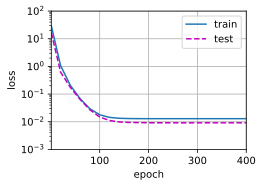

In [10]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

欠拟合

weight: [[3.0245023 4.4361024]]


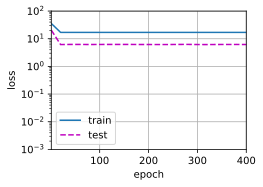

In [11]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

过拟合

weight: [[ 4.9779119e+00  1.3195552e+00 -3.3647349e+00  4.9928265e+00
  -7.4364521e-02  1.4247266e+00  1.6096410e-01 -4.2834585e-03
   1.9730285e-01 -1.4452817e-01 -5.5858660e-02  4.2323127e-02
  -8.3442651e-02  2.1534529e-01 -9.1786720e-02  5.3268239e-02
  -1.7045805e-01 -6.9507442e-02  1.3457973e-02 -2.6659101e-02]]


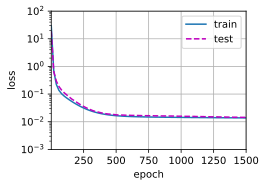

In [12]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)